<a href="https://colab.research.google.com/github/nicky5142/MyFirstApp/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://jamiewu128@bitbucket.org/jamiewu128/asl_alphabet.git

Cloning into 'asl_alphabet'...
remote: Counting objects: 87036, done.
remote: Compressing objects: 100% (87034/87034), done.
remote: Total 87036 (delta 0), reused 87033 (delta 0)
Receiving objects: 100% (87036/87036), 1.01 GiB | 13.47 MiB/s, done.
Checking out files: 100% (87029/87029), done.


In [0]:
dataset_dir='/content/asl_alphabet/asl_alphabet_train'
IMAGE_WIDTH=100
IMAGE_HEIGHT=100
IMAGE_CHANNELS=1 #chage RGB to Gray

In [0]:
#image data path
import os, shutil
from os import listdir

data_f=listdir(dataset_dir)
filename=[]
category=[]
for fdname in data_f:
  path=os.path.join(dataset_dir,fdname)
  if os.path.isdir(path):
    for fname in listdir(path):
      tempfilename, file_extension = os.path.splitext(fname)
      if file_extension=='.jpg':
        filename.append(os.path.join(path,fname))
        category.append(fdname)

In [0]:
# prepare image data
import numpy as np
import cv2
img_ary=[]
for path in filename:
  img = cv2.imread(path,0) #Transfer image to color gray
  img.resize((IMAGE_WIDTH,IMAGE_HEIGHT))
  img_np=np.array(img)
  img_ary.append(img_np)
 
X = np.array(img_ary)

In [5]:
# prepare label
import numpy as np
from sklearn.preprocessing import LabelEncoder

nb_classes = 29
le = LabelEncoder()
targets= le.fit_transform(category) #transform to integer
print(category)
print(targets)

Y = np.eye(nb_classes)[targets] # to one-hot

['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_N, y_train, y_N = train_test_split(X, Y, test_size = 0.15, random_state = 42)
x_test, x_valid, y_test, y_valid = train_test_split(x_N, y_N, test_size = 0.1, random_state = 42)

In [0]:
#reshape
x_train = x_train.reshape(-1,IMAGE_WIDTH,IMAGE_HEIGHT,1)
x_test = x_test.reshape(-1,IMAGE_WIDTH,IMAGE_HEIGHT,1)
x_valid = x_valid.reshape(-1,IMAGE_WIDTH,IMAGE_HEIGHT,1)


In [8]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import BatchNormalization

Using TensorFlow backend.


In [0]:
# Initialsing CNN
classifier=Sequential()

In [10]:
# First Convolution
classifier.add(Conv2D(16,(3,3),activation='relu', input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS)))

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# First Batch Normalize
#classifier.add(BatchNormalization())

In [0]:
# First Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Second Convolution and Pooling
classifier.add(Conv2D(32,(3,3),activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Third Convolution and Pooling
classifier.add(Conv2D(32,(3,3),activation='relu'))
#classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
# Flattening
classifier.add(Flatten())

In [0]:
# Full connection
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=nb_classes, activation='sigmoid'))

In [17]:
# Compiling CNN
#學習速率
from keras.optimizers import RMSprop
#classifier.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=0.001), metrics = ['accuracy'])
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
__________

In [18]:
# Fitting the CNN to the images
history = classifier.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Train on 73950 samples, validate on 11745 samples
Epoch 1/10
73950/73950 [==============================] - 40s 535us/step - loss: 0.1076 - acc: 0.9691 - val_loss: 0.0601 - val_acc: 0.9768
Epoch 2/10
73950/73950 [==============================] - 35s 475us/step - loss: 0.0489 - acc: 0.9805 - val_loss: 0.0386 - val_acc: 0.9848
Epoch 3/10
73950/73950 [==============================] - 35s 472us/step - loss: 0.0371 - acc: 0.9849 - val_loss: 0.0372 - val_acc: 0.9846
Epoch 4/10
73950/73950 [==============================] - 35s 472us/step - loss: 0.0309 - acc: 0.9873 - val_loss: 0.0285 - val_acc: 0.9887
Epoch 5/10
73950/73950 [==============================] - 35s 471us/step - loss: 0.0267 - acc: 0.9890 - val_loss: 0.0268 - val_acc: 0.9889
Epoch 6/10
73950/73950 [==============================] - 35s 472us/step - loss: 0.0239 - acc: 0.9901 - val_loss: 0.0301 - val_acc: 0.9881
Epoch 7/10
73950/73950 [==============================] - 35s 471us/

In [19]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

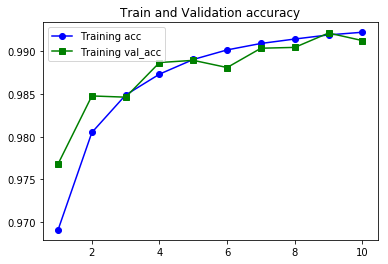

In [21]:
import matplotlib.pyplot as plt
plt.plot(epochs, acc, 'bo-', label='Training acc')
plt.plot(epochs, val_acc, 'gs-', label='Training val_acc')
plt.title('Train and Validation accuracy')
plt.legend()

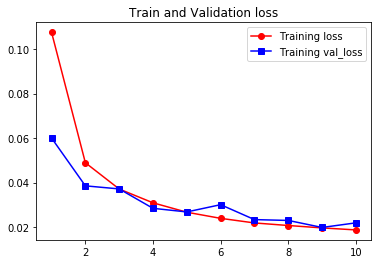

In [22]:
plt.plot(epochs, loss, 'ro-', label='Training loss')
plt.plot(epochs, val_loss, 'bs-', label='Training val_loss')
plt.title('Train and Validation loss')
plt.legend()